# Data Analyze and Visualization for E-commerce APP




This e-commerce company allows Retailers to order supplies online and wants to target customers with suggestions on items that a customer is most likely to purchase. I was provided with a dataset containing information on an e-commerce app, and the transaction data gives information about all the transactions that have taken place over time. We will be able to increase customer engagement, improve the consumer experience, optimise the app performance and discover customer behaviour by analysing and visualizing this data set. The data given was from July 2021 to July 2022 from that we can analyse business decisions, understand customers' and providers'(hosts) behaviour and performance of the app, guide marketing initiatives, implementation of innovative additional services, and much more.


### About Dataset

This dataset has around 3396790 rows × 19 columns and it is a mix of categorical and numeric values. You will find 3 tables attached. The login_logs table contains information about users logging in. The sales orders table contains information about orders made and the sales_orders_items contains the specifics of each order. The data given was from July 2021 and July 2022 from that we can analyze business decisions



### key performance indicators (***KPIs***)

In this data set will also use KPIs to measure the progress and insights that help people across the organization make better decisions. that demonstrates how effectively a company is achieving key progress and for the success of the business to reach its targets.

KPIs serve as a guidepost to help you to measure your business progress toward achieving your strategic goals. They give you a realistic look at the long-term health of your business, from risk factors to financial visibility. By tracking your KPIs, you can know where your e-commerce business is lacking so that you can streamline your processes for better efficiency and ensure that your business grows for years to come.




### Key learnings:

* Basics of python
* Basics of numpy, pandas library
* Basics of visualisation libraries (matplot and seaborn)
* Basics of data handling and cleaning



### Data Preparation

I am importing Pandas, NumPy, Matpoltlib, and Seaborn for analysing and visualising this data set.

In [1]:
import pandas  as pd
import numpy as np
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Loading the dataset into a data frame using Pandas.

In [2]:
soi = pd.read_csv('../input/ecommerce-app-data/sales_orders_items.csv')
so  = pd.read_csv('../input/ecommerce-app-data/sales_orders.csv')
ll  = pd.read_csv('../input/ecommerce-app-data/login_logs.csv')

### Merging data sets.

 
We merge 3 data sets into one Pandas data frame. We also combine these datasets to run certain operations on both datasets together.

In [3]:
a = pd.merge(so , soi , how = 'left' , left_on = 'order_id', right_on = 'fk_order_id')
b = pd.merge(a,ll,how = 'left',left_on = 'fk_buyer_id', right_on = 'user_id')

### Formatting Columns

we created new columns creation year, login year, order year, creation day, and login day from creation time and login time for better data analysis.

In [4]:
def x(s):
    ans = s.split('-')[0]
    return ans 

In [5]:
b['creation_year'] = b['creation_time'].apply(x)
b[['creation_year']].head()

,creation_year
0,2021
1,2021
2,2021
3,2021
4,2021


In [6]:
b['order_year'] = b['creation_time'].apply(x)
b[['order_year']].head()

,order_year
0,2021
1,2021
2,2021
3,2021
4,2021


In [7]:
b['login_year'] = b['login_time'].apply(x)
b[['login_year']].head()

,login_year
0,2021
1,2021
2,2021
3,2021
4,2021


In [8]:
def p(s):
    ans = s.split('-')[2]
    ans = ans.split(' ')[0]
    return ans 

In [9]:
b['creation_day'] = b['creation_time'].apply(p)
b[['creation_day']].head()

,creation_day
0,01
1,01
2,01
3,01
4,01


In [10]:
b['login_day'] = b['login_time'].apply(p)
b[['login_day']].head()

,login_day
0,01
1,01
2,01
3,01
4,01


### Exploring the dataset

we have given our data set name **b**


In [11]:
b

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,login_log_id,user_id,login_time,creation_year,order_year,login_year,creation_day,login_day
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0,62609,7818,119874,1,0,4993.000,1385357,82228,2021-07-01 00:34:36.0,2021,2021,2021,01,01
1,119874,82228,5,Rejected,2021-07-01 00:35:28.0,62609,7818,119874,1,0,4993.000,1385358,82228,2021-07-01 00:35:04.0,2021,2021,2021,01,01
2,119874,82228,5,Rejected,2021-07-01 00:35:28.0,62609,7818,119874,1,0,4993.000,1385360,82228,2021-07-01 00:36:32.0,2021,2021,2021,01,01
3,119874,82228,5,Rejected,2021-07-01 00:35:28.0,62609,7818,119874,1,0,4993.000,1385361,82228,2021-07-01 00:37:19.0,2021,2021,2021,01,01
4,119874,82228,5,Rejected,2021-07-01 00:35:28.0,62609,7818,119874,1,0,4993.000,1385362,82228,2021-07-01 00:37:32.0,2021,2021,2021,01,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396785,318972,190076,9,Shipped,2022-07-30 18:17:49.0,157588,8421,318972,1,1,4714.000,4669240,190076,2022-07-30 15:17:00.0,2022,2022,2022,30,30
3396786,318972,190076,9,Shipped,2022-07-30 18:17:49.0,157588,8421,318972,1,1,4714.000,4669628,190076,2022-07-30 16:06:28.0,2022,2022,2022,30,30
3396787,318972,190076,9,Shipped,2022-07-30 18:17:49.0,157588,8421,318972,1,1,4714.000,4670357,190076,2022-07-30 18:13:09.0,2022,2022,2022,30,30
3396788,318972,190076,9,Shipped,2022-07-30 18:17:49.0,157588,8421,318972,1,1,4714.000,4670369,190076,2022-07-30 18:17:46.0,2022,2022,2022,30,30


### Exploring the dataset

In [12]:
b.shape

(3396790, 19)

In [13]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396790 entries, 0 to 3396789
Data columns (total 19 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   order_id                 int64  
 1   fk_buyer_id              int64  
 2   fk_depot_id              int64  
 3   sales_order_status       object 
 4   creation_time            object 
 5   order_item_id            int64  
 6   fk_product_id            int64  
 7   fk_order_id              int64  
 8   ordered_quantity         int64  
 9   order_quantity_accepted  int64  
 10  rate                     float64
 11  login_log_id             int64  
 12  user_id                  int64  
 13  login_time               object 
 14  creation_year            object 
 15  order_year               object 
 16  login_year               object 
 17  creation_day             object 
 18  login_day                object 
dtypes: float64(1), int64(10), object(8)
memory usage: 518.3+ MB


### Checking Null Values of each column

In [14]:
b.isnull().sum()

order_id                   0
fk_buyer_id                0
fk_depot_id                0
sales_order_status         0
creation_time              0
order_item_id              0
fk_product_id              0
fk_order_id                0
ordered_quantity           0
order_quantity_accepted    0
rate                       0
login_log_id               0
user_id                    0
login_time                 0
creation_year              0
order_year                 0
login_year                 0
creation_day               0
login_day                  0
dtype: int64

### <span style="color:#ff3300">  Analyzing Phase</span> <a class="anchor" id="analyze_phase_5"></a>

We will analyze trends in the user's marketing strategy. Now that we are ready for an exploration of our data. Let's start with understanding the unique values and categorical data that we have in our dataset for better decisions.

We will be Asking And Answering Some Questions and we will also use **KPIs (key performance indicators)** for Analyzing the data for the performance of the app.



#### Finding the Total User's  Company have.

In [15]:
total_user = b.groupby(['user_id'])['user_id'].count().count()
total_user

4832

#### now examining the users in different year (2021-2022)

In [16]:
users =  b.groupby(['creation_year']).agg({'user_id':pd.Series.nunique}).reset_index()
users.head()  

,creation_year,user_id
0,2021,2452
1,2022,2980


#### Number of user's in 2021


In [17]:
total_user_2021 = users[users['creation_year']== '2021'][['creation_year','user_id']].reset_index()
total_user_2021.head()

,index,creation_year,user_id
0,0,2021,2452


#### Number of user's in 2022

In [18]:
total_user_2022 = users[users['creation_year']== '2022'][['creation_year','user_id']].reset_index()
total_user_2022.head()

,index,creation_year,user_id
0,1,2022,2980


#### Now, let's find out the user's engagement

In [19]:
b21 =  b[b['creation_year']=='2021']
b22 =  b[b['creation_year']=='2022']
b21 = b21.groupby("user_id").agg({'order_id':'count'}).reset_index() 
b22 = b22.groupby("user_id").agg({'order_id':'count'}).reset_index() 
b21['user_id21'] = b21['user_id']
b22['user_id22'] = b22['user_id']
b21 = b21.drop(['order_id','user_id'],axis=1)
b22 = b22.drop(['order_id','user_id'],axis=1)


In [20]:
u_l = pd.merge(b21, b22,left_on = 'user_id21', right_on = 'user_id22', how="outer", indicator=True
              ).query('_merge=="left_only"')
n_u_2022 = pd.merge(b21, b22, left_on = 'user_id21', right_on = 'user_id22', how="outer", indicator=True
              ).query('_merge=="right_only"')

### Total  Number of user's in 2021 and 2022

In [21]:
total_user

4832

#### Number of user's in 2021 

In [22]:
user_at_start = total_user_2021['user_id']
user_at_start.iloc[0]

2452

#### Number of user's in 2022

In [23]:
user_at_end = total_user_2022['user_id']
user_at_end.iloc[0]


2980

#### Total number of user's lost from 2021

In [24]:
user_lost = u_l['user_id21'].count()
user_lost

1852

#### Total number of new user's added in 2022 

In [25]:
new_user_2022 = n_u_2022['user_id22'].count()
new_user_2022

2380

#### Total number of user's who sticks from 2021 and still using app in 2022 

In [26]:
user_stick =  pd.merge(b21,b22,how = 'inner',left_on = 'user_id21', right_on = 'user_id22')
user_stick_2021 = user_stick['user_id21'].count()
user_stick_2021

600

#### Analyzing by visualizing data of Users Engagement

 By ploating bar graph 

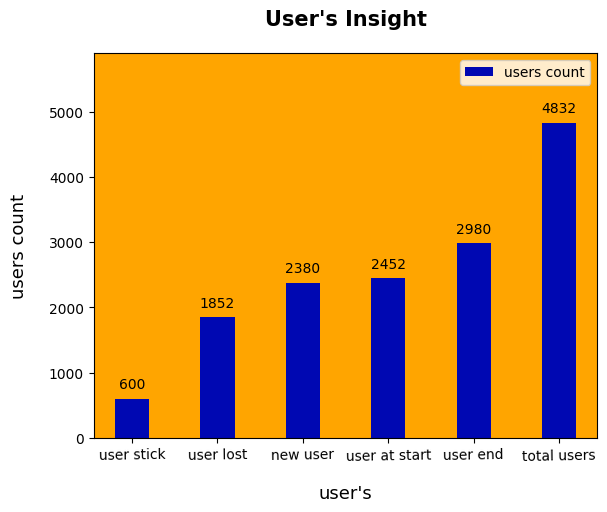

In [27]:
plt.rcdefaults()
df = pd.DataFrame({'users': ['user stick', 'user lost', 'new user', 'user at start', 'user end','total users'],
                   'users count': [600, 1852, 2380,2452, 2980,4832]})
plt.rcParams["figure.figsize"] = (6.5,5)
ax = df.plot.bar(x='users', y='users count',width = 0.4, legend=1,color ='#0008b2')
ax.set_facecolor("orange")
plt.xlabel("user's",fontsize=13,labelpad = 15)
plt.ylabel("users count",fontsize=13,labelpad = 15)
plt.title("User's Insight",y=1.05,fontsize=15,weight='bold')
ax.bar_label(ax.containers[0],padding = 5)
plt.ylim(0,5900)
plt.xticks(rotation=1)
plt.grid(False)
plt.show()

> ***visualization of Bar chart of User's Insight***

### KPIs (key performance indicators)

So now we are using KPIs (key performance indicators) to measure the progress and insights that help people across the organisation make better decisions. that demonstrates how effectively a company is achieving key progress and for the success of business to reach its targets.







#### So, The First KPI we use is :-

## <span style="color:#ff0000">  1)  User Growth Rate (KPI)</span> <a class="anchor" id="analyze_phase_5"></a>


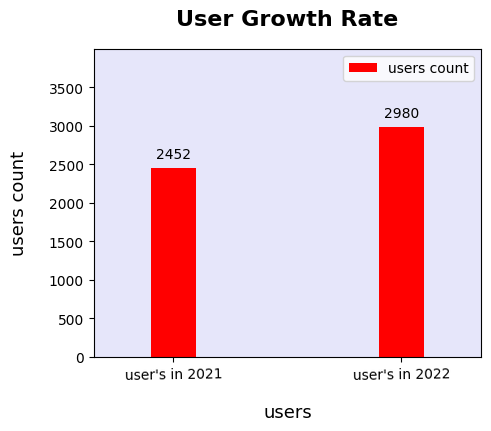

In [28]:
df = pd.DataFrame({'users': [ "user's in 2021","user's in 2022"],
                   'users count': [2452, 2980]})
plt.rcParams["figure.figsize"] = (5,4)
ax = df.plot.bar(x='users', y='users count',width = 0.2, legend=1,color ='red')
ax.set_facecolor("#e6e6fa")
plt.xlabel("users",fontsize=13,labelpad = 15)
plt.ylabel("users count",fontsize=13,labelpad = 15)
plt.title("User Growth Rate",y=1.05,fontsize=16,weight='bold')
ax.bar_label(ax.containers[0],padding = 5)
plt.ylim(0,3999)
plt.xticks(rotation=1)
plt.grid(False)
plt.show()

> ***visualization of Bar chart of User Growth in 2021 & 2022***





## <span style="color:#80008b">   Asking And Answering Some Questions 



### <span style="color:#0000ff"> Q1.) Did our user base grow?



    

    

From the above graph, We can see that the number of users in 2021 is **2452** and in the year 2022 it has increased and become **2980** so, yes it is clear that our user base has grown.




#### Second KPI we use is :-

## <span style="color:#ff0000">  2) Churn Rate And Retaintion Rate (KPI) </span> <a class="anchor" id="analyze_phase_5"></a>

### Retaintion Rate

In [29]:
r_rate = ((user_at_end - new_user_2022)/user_at_start)*100
retaintion_rate = r_rate.iloc[0]
retaintion_rate

24.469820554649267

### Churn Rate

In [30]:
c_rate = ((user_at_start - user_stick_2021)/user_at_start)*100
churn_rate =c_rate.iloc[0]
churn_rate

75.53017944535073

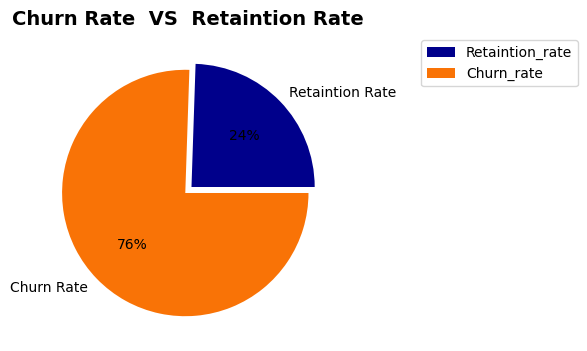

In [31]:
x = [retaintion_rate,churn_rate]
fig, ax = plt.subplots()
labels=['Retaintion Rate','Churn Rate']
explode = [0,0.07]
colors = ['#00008b', '#f97306']
ax.pie(x, labels = labels, colors = colors, autopct='%.0f%%',explode = explode)
ax.set_title('Churn Rate  VS  Retaintion Rate ',fontsize=14,weight='bold')
plt.legend(labels=['Retaintion_rate','Churn_rate'],loc="upper center", bbox_to_anchor=(1.5, 1))
plt.show()

> ***visualization of pie Chart of Churn Rate & Retaintion Rate***







##### 






#### Third KPI is :-
## <span style="color:#ff0000">  3)  Active users (KPI) </span> <a class="anchor" id="analyze_phase_5"></a>

### Daily Active User (DAU) 2021

Knowing how many people have used your app in one day in the month July 2021

In [32]:
dau2021 = b[b['login_year']=='2021']
daily_active_user_2021 =  dau2021.groupby(['login_year','login_day',]).agg({'user_id':pd.Series.nunique}).reset_index().head(31)
daily_active_user_2021

,login_year,login_day,user_id
0,2021,01,682
1,2021,02,664
2,2021,03,674
3,2021,04,532
4,2021,05,765
5,2021,06,725
6,2021,07,786
7,2021,08,797
8,2021,09,783
9,2021,10,771



### Daily Active User (DAU) 2022


Knowing how many people have used your app in one day in the month July 2022





In [33]:
dau2022 = b[b['login_year']=='2022']
daily_active_user_2022 =  dau2022.groupby(['login_year','login_day',]).agg({'user_id':pd.Series.nunique}).reset_index().head(31)
daily_active_user_2022

,login_year,login_day,user_id
0,2022,01,983
1,2022,02,1066
2,2022,03,931
3,2022,04,1272
4,2022,05,1264
5,2022,06,1111
6,2022,07,1254
7,2022,08,1225
8,2022,09,1170
9,2022,10,815


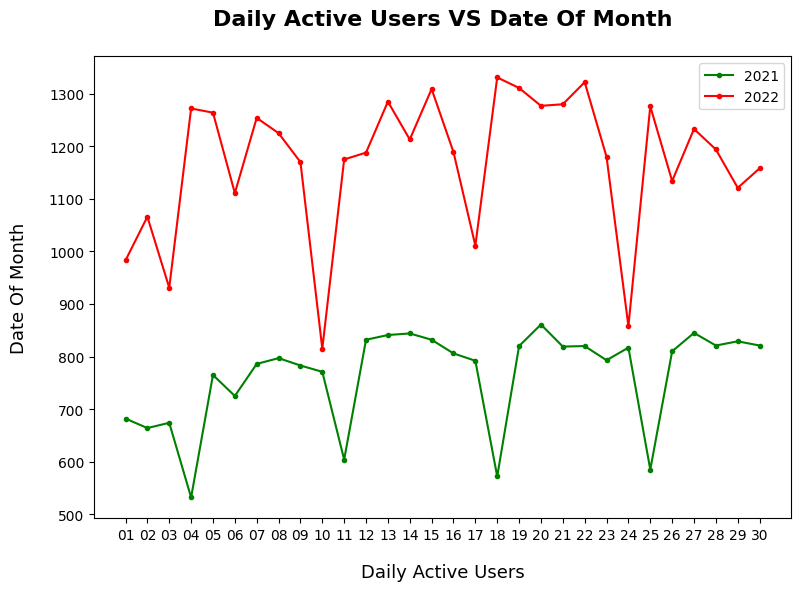

In [34]:
plt.rcdefaults()
df_dau21 = daily_active_user_2021
df_dau22 = daily_active_user_2022

plt.figure(figsize=(9,6))
plt.plot(df_dau21.login_day,df_dau21.user_id, 'g.-', label='2021')
plt.plot(df_dau22.login_day,df_dau22.user_id, 'r.-', label='2022')
plt.title('Daily Active Users VS Date Of Month',y=1.05, fontdict={'fontweight':'bold', 'fontsize': 16})
plt.xlabel('Daily Active Users',fontsize=13,labelpad = 15)
plt.ylabel('Date Of Month',fontsize=13,labelpad = 15)
plt.legend()
plt.show()

> ***visualization of Line Graph of Daily Active Users in 2021 & 2022***

##### 




### <span style="color:#0000ff"> Q2.)  What are our top-selling products in each of the two years? draw some insight from this?

#### Top Selling Products in 2021

In [35]:
tsp2021 = b[b['creation_year']== '2021']
top_selling_products_2021 = tsp2021.groupby(['fk_product_id'])['order_quantity_accepted'].sum().reset_index()
top_selling_products_2021=top_selling_products_2021.sort_values(by=['order_quantity_accepted'], ascending=False).reset_index()
top_selling_products_2021 = top_selling_products_2021.drop(['index'],axis= 1).head(5)
top_selling_products_2021

,fk_product_id,order_quantity_accepted
0,10235,135218
1,8219,105451
2,8428,69411
3,9925,66919
4,1040,61431


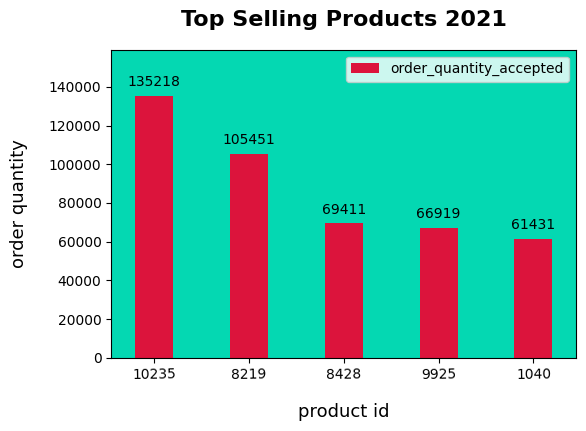

In [36]:
df_tsp21 = top_selling_products_2021
plt.rcParams["figure.figsize"] = (6,4)
bargraph = df_tsp21.plot.bar(x = 'fk_product_id', y='order_quantity_accepted',width = 0.4, legend=1,color = '#DC143C')
bargraph.set_facecolor("#04D8B2")
plt.xlabel("product id",fontsize=13,labelpad = 15)
plt.ylabel("order quantity",fontsize=13,labelpad = 15)
plt.title("Top Selling Products 2021",y=1.05,fontsize=16,weight='bold')
bargraph.bar_label(bargraph.containers[0],padding = 5)
plt.ylim(0,159218)
plt.grid(False)
plt.xticks(rotation=1)
plt.show()

>  ***visualization of bar chart of top selling products in 2021***




#### Top Selling Products in 2022

In [37]:
tsp2022 = b[b['creation_year']== '2022']
top_selling_products_2022 = tsp2022.groupby(['fk_product_id'])['order_quantity_accepted'].sum().reset_index()
top_selling_products_2022=top_selling_products_2022.sort_values(by=['order_quantity_accepted'], ascending=False).reset_index()
top_selling_products_2022=top_selling_products_2022.drop(['index'],axis= 1).head(5)
top_selling_products_2022

,fk_product_id,order_quantity_accepted
0,8444,209539
1,12749,129855
2,12652,128612
3,8428,116089
4,8219,111508


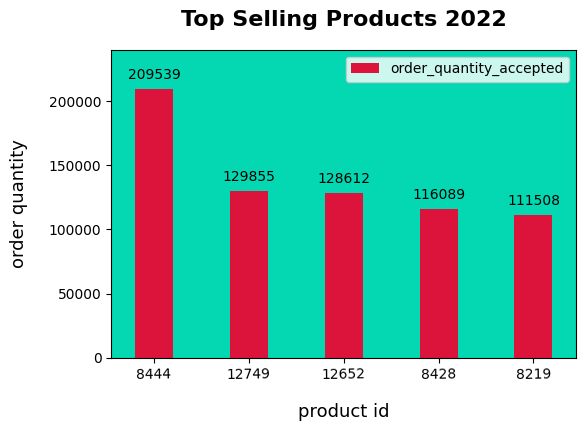

In [38]:
df_tsp22 = top_selling_products_2022
plt.rcParams["figure.figsize"] = (6,4)
bargraph = df_tsp22.plot.bar(x = 'fk_product_id', y='order_quantity_accepted',width = 0.4, legend=1,color = '#DC143C')
bargraph.set_facecolor("#04D8B2")
plt.grid(False)
plt.xlabel("product id",fontsize=13,labelpad = 15)
plt.ylabel("order quantity",fontsize=13,labelpad = 15)
plt.title("Top Selling Products 2022",y=1.05,fontsize=16,weight='bold')
bargraph.bar_label(bargraph.containers[0],padding = 5)
plt.ylim(0,239999)
plt.xticks(rotation=1)
plt.show()

>  ***visualization of bar chart of top selling products in 2022***

### <span style="color:#0000ff"> Q3.) What are our Top Revenue Genrated Products of 2021 & 2022? 
    
    


#### Top Revenue generated Products of 2021

In [39]:
b['total_product_cost'] = b['order_quantity_accepted']*b['rate']

In [40]:
b2021 = b[b['creation_year']== '2021'] 
tp2021 = b2021.groupby(['fk_product_id'])['total_product_cost'].sum().reset_index()  
top_rev_gen_pro_2021 = tp2021.sort_values(by=['total_product_cost'], ascending=False).head(5)
top_rev_gen_pro_2021

,fk_product_id,total_product_cost
184,8219,1405553620.500
180,8210,558193512.000
103,7640,427209937.600
384,10975,425228092.960
40,3610,289119038.000


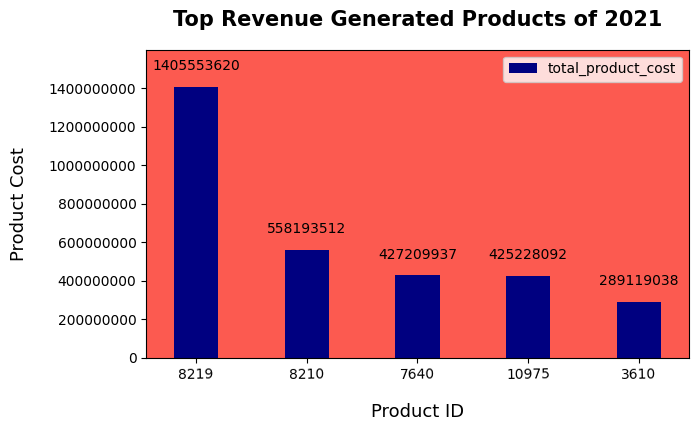

In [41]:
df_trgp21 = top_rev_gen_pro_2021
plt.rcParams["figure.figsize"] = (7,4)
bargraph = df_trgp21.plot.bar(x = 'fk_product_id', y='total_product_cost',color = '#000080',width = 0.4, legend=1)
bargraph.set_facecolor("#FC5A50")
plt.grid(False)
plt.xlabel("Product ID",fontsize=13,labelpad = 15)
plt.ylabel("Product Cost",fontsize=13,labelpad = 15)
plt.title("Top Revenue Generated Products of 2021",y=1.05,fontsize=15,weight='bold')
bargraph.bar_label(bargraph.containers[0],padding = 10, fmt = '%d')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylim(0,1599301234.000)
plt.xticks(rotation=1)
plt.show()

>  ***visualization bar chart of Top Revenue generated Products of  2021***



#### Top Revenue generated Products of 2022

In [42]:
b2022 = b[b['creation_year']== '2022'] 
tp2022 = b2022.groupby(['fk_product_id'])['total_product_cost'].sum().reset_index()  
top_rev_gen_pro_2022 = tp2022.sort_values(by=['total_product_cost'], ascending=False).head(5)
top_rev_gen_pro_2022

,fk_product_id,total_product_cost
111,8219,1595301234.000
178,8444,1312271132.000
73,7640,1159594897.000
348,12652,989376726.000
25,3610,878566510.000


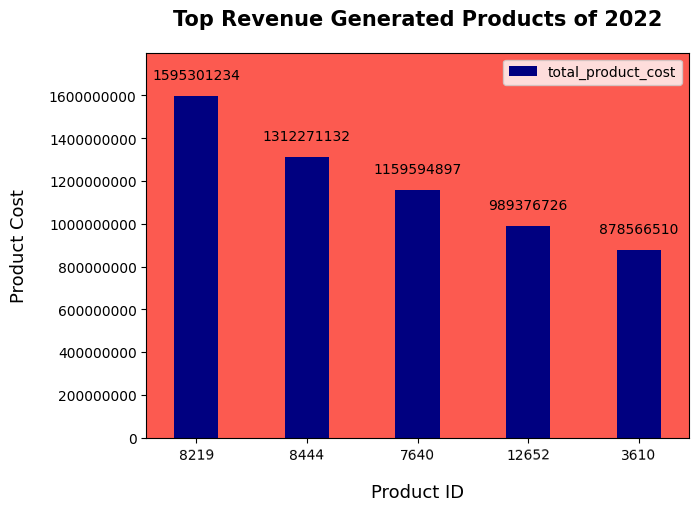

In [43]:
df_trgp22 = top_rev_gen_pro_2022
plt.rcParams["figure.figsize"] = (7,5)
bargraph = df_trgp22.plot.bar(x = 'fk_product_id', y='total_product_cost',color = '#000080',width = 0.4, legend=1)
bargraph.set_facecolor("#FC5A50")
plt.grid(False)
plt.xlabel("Product ID",fontsize=13,labelpad = 15)
plt.ylabel("Product Cost",fontsize=13,labelpad = 15)
plt.title("Top Revenue Generated Products of 2022",y=1.05,fontsize=15,weight='bold')
bargraph.bar_label(bargraph.containers[0],padding = 10, fmt = '%d')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylim(0,1799301234.000)
plt.xticks(rotation=1)
plt.show()

>  ***visualization of bar chart of Top Revenue Generated Products of  2022***



#### Fourth KPI is :-
## <span style="color:#ff0000">  4)  Revenue Generated  (KPI) </span> <a class="anchor" id="analyze_phase_5"></a>

### <span style="color:#0000ff"> Q4.) Does Company Revenue Increases?

In [44]:
total_pc = b.groupby(['fk_product_id'])['total_product_cost'].sum().reset_index() 
#total_pc.sort_values(by=['total_product_cost'], ascending=False)

#### Total Revenue

In [45]:
total_revenue = total_pc['total_product_cost'].sum()
total_revenue

25510879653.048

#### Revenue in 2021

In [46]:
revenue_2021 = tp2021['total_product_cost'].sum()
revenue_2021

8474764776.1779995

#### Revenue in 2022

In [47]:
revenue_2022 = tp2022['total_product_cost'].sum()
revenue_2022

17036114876.87

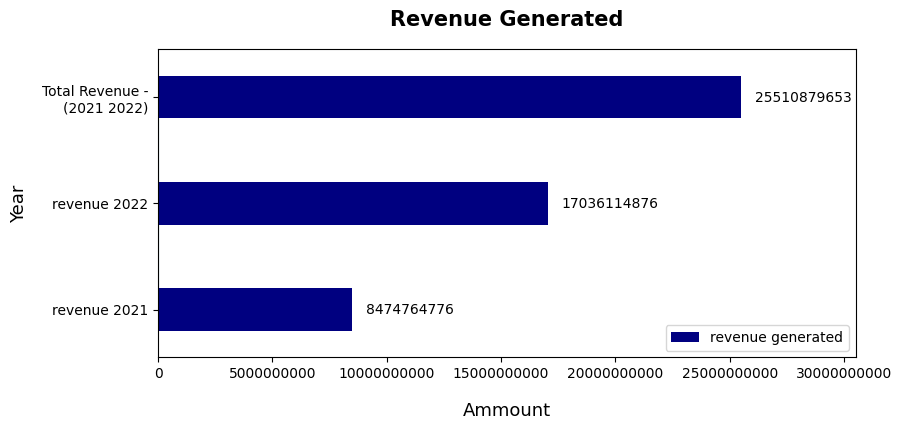

In [48]:
dfvasu = pd.DataFrame({'year': ['2021', '2022', 'Total (2021-2022)'],
                   'revenue generated': [8474764776.1779995, 17036114876.87, 25510879653.048]})
plt.rcParams["figure.figsize"] = (9,4)
colors = sns.color_palette("spring", len(dfvasu))
ax = dfvasu.plot.barh(x='year', y='revenue generated',width = 0.4, legend=1,color = '#000080')
plt.xlabel("Ammount",fontsize=13,labelpad = 15)
plt.ylabel("Year",fontsize=13,labelpad = 10)
plt.title("Revenue Generated",y=1.05,fontsize=15,weight='bold')
plt.gcf().axes[0].xaxis.get_major_formatter().set_scientific(False)
ax.ticklabel_format(style='plain', axis="x")
ax.bar_label(ax.containers[0],padding = 10, fmt = '%d')
ylabels = ['revenue 2021','revenue 2022','Total Revenue -(2021 2022)']
ylabels_new = [label.replace('-', '-\n') for label in ylabels]
plt.plot(range(3))
plt.yticks(range(3), ylabels_new)
plt.xlim(0,30510879653)
plt.show()

>  ***visualization of Horizontal Bar Graph of Total Revenue Generated***

Yes, revenue has increased, From the above bar chart, we can clearly see that revenue growth increased by almost more than double in the year of 2022 as compared with 2021.

### <span style="color:#0000ff"> Q5.) Does Sales Order Status can effect the company growth?

In [49]:
ss =  b.groupby(['order_year','sales_order_status']).agg({'order_id':pd.Series.nunique}).reset_index()

In [50]:
sales_status = ss[(ss["sales_order_status"]=='Rejected')  | (ss ["sales_order_status"]=='Shipped')]
sales_status = sales_status.reset_index()
sales_status = sales_status.drop(['index'],axis=1)
sales_status

,order_year,sales_order_status,order_id
0,2021,Rejected,3764
1,2021,Shipped,2434
2,2022,Rejected,3899
3,2022,Shipped,3489


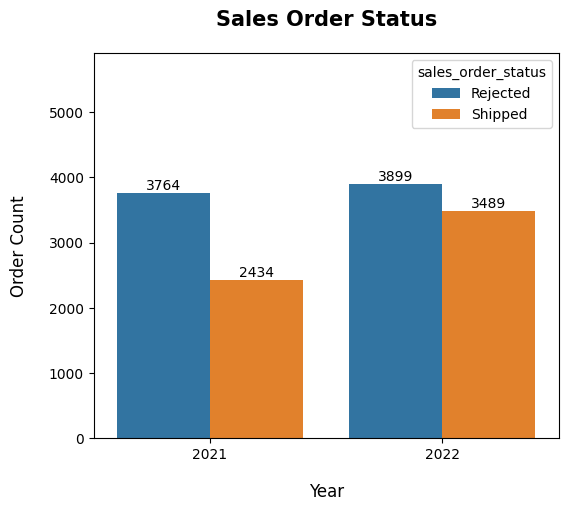

In [51]:
plt.rcParams["figure.figsize"] = (6,5)
ax = sns.barplot(data = sales_status,x='order_year', hue = 'sales_order_status', y = 'order_id')
for i in ax.containers:
    ax.bar_label(i,)
ax.set_title("Sales Order Status",y=1.05,fontsize=15,weight='bold')
ax.set_xlabel('Year',fontsize=12,labelpad = 15)
ax.set_ylabel('Order Count',fontsize=12,labelpad = 15)
plt.grid(False)
plt.ylim(0,5900)

plt.show()

> ***visualization of Bar Graph of sales order status in 2021 & 2022***

It is clear from the above chart that in the year of 2022 number of items shipped has increased as compared to the year 2021, While the number of items rejected is nearly the same and it does not show a significant increase. From this, we conclude that in the year of 2022 number of items that have shipped has increased and it does affect in revenue growth of the company.

####  



#### Fifth KPI is :-
## <span style="color:#ff0000">  5)  User's Engagement  (KPI) </span> <a class="anchor" id="analyze_phase_5"></a>
#### User's VS User's Who Order 

In [52]:
### user id who order at least once
tuo = b[b['order_quantity_accepted']>0]
total_user_who_order =  tuo.groupby(['creation_year']).agg({'user_id':pd.Series.nunique}).reset_index()
###total_user_who_order.head()  

In [53]:
users_vs_orders = users['users_who_orders'] = total_user_who_order['user_id']
users.head()

,creation_year,user_id,users_who_orders
0,2021,2452,1533
1,2022,2980,1919


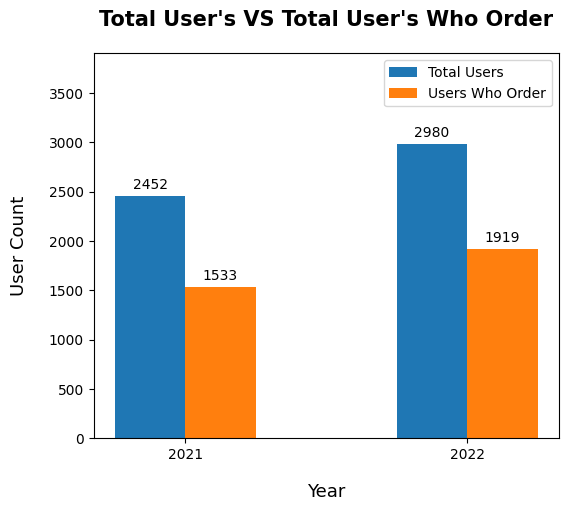

In [54]:
year = ['2021', '2022']
user_id = [2452, 2980]
users_who_orders = [1533, 1919]

x = np.arange(len(year))
width = 0.25
plt.rcParams["figure.figsize"] = (6,5)
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, user_id, width, label='Total Users')
rects2 = ax.bar(x + width/2, users_who_orders, width, label='Users Who Order')
ax.set_xlabel('Year',fontsize=13,labelpad = 15)
ax.set_ylabel('User Count',fontsize=13,labelpad = 15)
ax.set_title("Total User's VS Total User's Who Order",y=1.05,fontsize=15,weight='bold')
ax.set_xticks(x, year)
ax.legend()
plt.ylim(0,3900)
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
plt.show()

> ***visualization of Group Bar Graph of User's Engagement***

From the above bar chart, we know that there is an increment in the number of users from 2021 to 2022 and also in the number of users who placed orders.



 

#### Sixth KPI is :-
## <span style="color:#ff0000">  6)  Website Traffic  (KPI) </span> <a class="anchor" id="analyze_phase_5"></a>


#####  

### <span style="color:#0000ff"> Q5.) Does the login frequency affect the number of orders placed?

In [55]:
login_frequency  =  b.groupby(['order_year']).agg({'login_time':'count','order_id':pd.Series.nunique}).reset_index()
login_frequency.head()

,order_year,login_time,order_id
0,2021,1662212,6216
1,2022,1734578,7414


We can clearly see that in the year 2022 there is an increase in the number of logins in 2022 as compared to 2021 and also in the number of orders placed, so from that we can conclude that yes, login frequency does affect the number of orders placed.


#### 




## Conclusion


KPIs can feel confusing, overwhelming, and frustratingly difficult to apply. But the time and effort that you put into tracking and understanding them will undoubtedly pay off. Learning about the relationships between the core components of your business will enable you to make informed, objective decisions. And these decisions can have an incredible impact on your business’s bottom line.


With the help of KPIs, we Based on the results of these calculations we can be used as a recommendation for retail owners to arrange the arrangement of product catalogs and take strategic steps to improve product marketing. By utilizing the association rules which are discovered as a result of the analyses, the retailer can apply effective marketing and sales promotion strategies, he will be able to increase customer engagement and improve customer experience and identify customer behavior.

Remember, "knowledge is power". So work to understand your business’s data, and harness the actionable insights that will propel you forward.


We hope this project inspires you on where to start and how to approach a similar case in the future.



####  

***Thanks for reading out …***

***Hope you find this kernel helpful :)***

